<a href="https://colab.research.google.com/github/HabibaAbderrahim/advanced_data-preparation-tool-pack/blob/main/combine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Description**

How to load and combine data in this form :

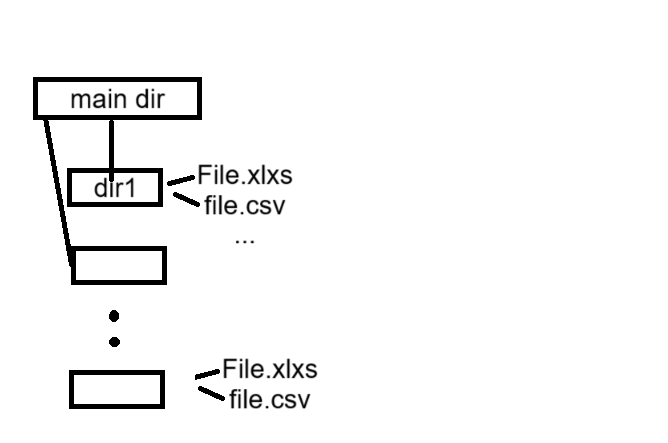

In [ ]:
import time
import os
import gspread
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Main directory containing plant subfolders on Google Drive
main_directory = '/content/drive/MyDrive/Folder_Analysis'

In [ ]:
# Create an empty DataFrame to store all data
combined_data = pd.DataFrame()

In [ ]:
# Loop through each subfolder
for plant_folder in os.listdir(main_directory):
    plant_path = os.path.join(main_directory, plant_folder)

    # Check if it's a directory
    if os.path.isdir(plant_path):
        plant_name = plant_folder
        for file in os.listdir(plant_path):
            if file.endswith('.xlsx') or file.endswith('.xls'):  # Handle both .xlsx and .xls files
                file_path = os.path.join(plant_path, file)
                if file.endswith('.xlsx'):
                    df = pd.read_excel(file_path)
                elif file.endswith('.xls'):
                    df = pd.read_excel(file_path, engine='xlrd')  # Use 'xlrd' engine for .xls files
                # Add a "column Name" column and set it to the current folder's name
                df['column Name'] = plant_name
                combined_data = combined_data.append(df, ignore_index=True)

# Save the combined data to a CSV file
combined_data.to_csv('combined_data.csv', index=False)